In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

(787, 500, 3)


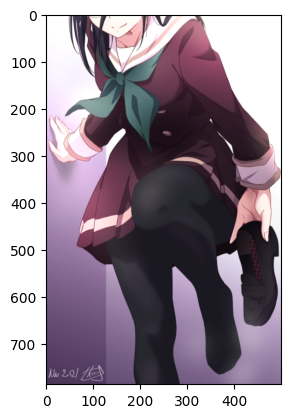

In [2]:
image = cv2.imread("../images/94147214_p0.png")
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [53]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 图像直方图

是指对整个图像像在灰度范围内的像素值(0~255)统计出现频率次数，据此生成的直方图，称为图像直方图-直方图。直方图反映了图像灰度的分布情况。是图像的统计学特

# calcHist 直方图计算

直方图概念是基于图像像素值，其实对图像梯度、每个像素的角度、等一切图像的属性值，我们都可以建立直方图。这个才是直方图的概念真正意义，不过是基于图像像素灰度直方图是最常见的。

直方图最常见的几个属性：
- dims 表示维度，对灰度图像来说只有一个通道值dims=1
- bins 表示在维度中子区域大小划分，bins=256，划分为256个级别
- range 表示值得范围，灰度值范围为[0~255]之间

(256, 1)
(256, 1)
(256, 1)


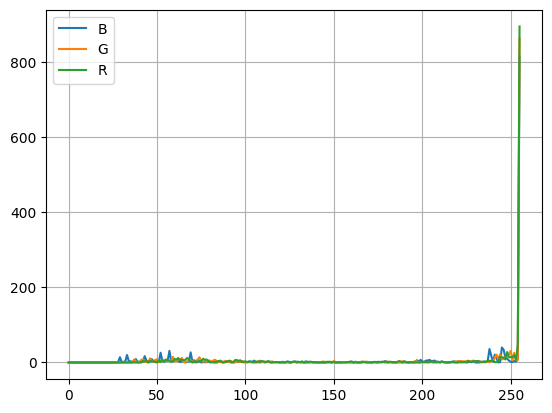

In [45]:
for i in range(3):
    hist = cv2.calcHist(
        images=image,   # 图像
        channels=[i],   # 查看哪个通道,彩色图可以用[0],[2],[2], 灰度图用[0]
        mask=None,
        histSize=[256], # BIN 的数目
        ranges=[0, 256],# 每个像素值的像素数，即从0到255
    )
    print(hist.shape)   # 代表每个亮度值得数目
    plt.plot(hist, label=["B", "G", "R"][i])
plt.grid()
plt.legend()

# compareHist 直方图比较方法

对输入的两张图像计算得到直方图H1与H2，归一化到相同的尺度空间

然后可以通过计算H1与H2的之间的距离得到两个直方图的相似程度进

而比较图像本身的相似程度。Opencv提供的比较方法有四种：
- Correlation     相关性比较
- Chi-Square      卡方比较
- Intersection    十字交叉性
- Bhattacharyya distance 巴氏距离

In [50]:
hist1 = cv2.calcHist(
    images=image,   # 图像
    channels=[0],   # 查看哪个通道,彩色图可以用[0],[2],[2], 灰度图用[0]
    mask=None,
    histSize=[256], # BIN 的数目
    ranges=[0, 256],# 每个像素值的像素数，即从0到255
)
hist2 = cv2.calcHist(
    images=image,   # 图像
    channels=[1],   # 查看哪个通道,彩色图可以用[0],[2],[2], 灰度图用[0]
    mask=None,
    histSize=[256], # BIN 的数目
    ranges=[0, 256],# 每个像素值的像素数，即从0到255
)
hist3 = cv2.calcHist(
    images=image,   # 图像
    channels=[2],   # 查看哪个通道,彩色图可以用[0],[2],[2], 灰度图用[0]
    mask=None,
    histSize=[256], # BIN 的数目
    ranges=[0, 256],# 每个像素值的像素数，即从0到255
)

In [48]:
cv2.compareHist(
    H1 = hist1,
    H2 = hist2,
    method=cv2.HISTCMP_INTERSECT
)

1116.0

In [51]:
cv2.compareHist(
    H1 = hist1,
    H2 = hist3,
    method=cv2.HISTCMP_INTERSECT
)

1077.0

In [52]:
cv2.compareHist(
    H1 = hist2,
    H2 = hist3,
    method=cv2.HISTCMP_INTERSECT
)

1213.0

# equalizeHist 直方图均衡化

是一种提高图像对比度的方法，拉伸图像灰度值范围

如何实现，通过上一课中的remap我们知道可以将图像灰度分布从一个分布映射到另外一个分布，然后在得到映射后的像素值即可

In [ ]:
# 彩色图不行
cv2.equalizeHist(image)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


In [ ]:
equalize_hist = cv2.equalizeHist(image_gray) # 必须是8-bit的单通道图像
equalize_hist.shape

(787, 500)

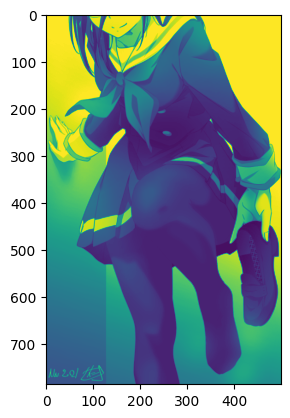

In [ ]:
plt.imshow(image_gray)

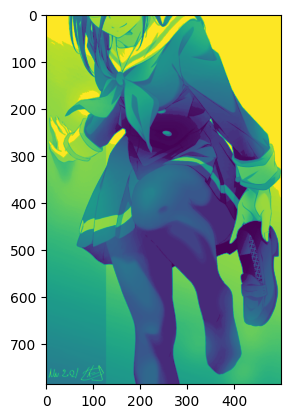

In [ ]:
plt.imshow(equalize_hist)

# calcBackProject 直方图反向投影

反向投影是反映直方图模型在目标图像中的分布情况

简单点说就是用直方图模型去目标图像中寻找是否有相似的对象。通常用HSV色彩空间的HS两个通道直方图模型


In [54]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hsv.shape

(787, 500, 3)

In [55]:
image_hue = image_hsv[:, :, :2]
image_hue.shape

(787, 500, 2)

In [56]:
hist4 = cv2.calcHist(
    images=image_hue,   # 图像
    channels=[0],       # 查看哪个通道,彩色图可以用[0],[2],[2], 灰度图用[0]
    mask=None,
    histSize=[256],     # BIN 的数目
    ranges=[0, 256],    # 每个像素值的像素数，即从0到255
)
hist4.min(), hist4.max()

(0.0, 489.0)

In [59]:
hist4_norm = cv2.normalize(
    src=hist4,
    dst=None,
    alpha=0,
    beta=1,
    norm_type=cv2.NORM_MINMAX,
)
hist4_norm.min(), hist4_norm.max()

(0.0, 1.0)

In [63]:
cbp = cv2.calcBackProject(
    images=image_hue,
    channels=[0],
    hist=hist4_norm,
    ranges=[0, 256],
    scale=1
)
cbp.shape

(500, 2)

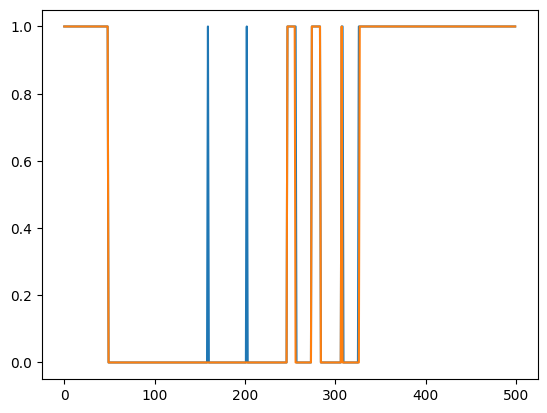

In [64]:
plt.plot(cbp)